In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import time
from astroquery.gaia import Gaia

In [2]:
# plotting style (optional!)
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mlmodern}'

mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)
mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)

mpl.rcParams['xtick.major.size'] = 10.0
mpl.rcParams['xtick.major.width'] = 1.75
mpl.rcParams['ytick.major.size'] = 10.0
mpl.rcParams['ytick.major.width'] = 1.75

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 10.0
mpl.rcParams['ytick.major.pad'] = 10.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 5.0
mpl.rcParams['xtick.minor.width'] = 1.75
mpl.rcParams['ytick.minor.size'] = 5.0
mpl.rcParams['ytick.minor.width'] = 1.75

mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# Colors and absolute magnitudes for the (real star) planet hosts

In [3]:
# load exoplanet catalog
DR5_df = pd.read_csv('DR5_mock_exoplanet_catalog.csv', encoding='utf-8')
DR5_df

,Gaia source IDs,True distance [pc],True RA [deg],True Dec [deg],Stellar mass [M_\odot],G-band mag,True planet mass [M_J],True period [days],True inclination [deg],True eccentricity,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,1914881589484335744,242.027,346.723264,35.231956,0.773,12.987,5.487,2095.254,40.356,0.170,...,2212.359,5.489,5.994,6.515,0.040,0.120,0.228,31.818,41.066,48.745
1,33660762506050688,124.050,42.005258,16.067598,0.961,9.894,3.102,1591.664,59.503,0.345,...,1679.253,2.620,3.314,7.731,0.180,0.556,0.970,49.166,66.446,80.789
2,5980784879311008640,384.556,239.857998,-54.198063,0.759,14.951,6.589,3254.088,157.010,0.188,...,3647.850,8.733,12.552,38.803,0.353,0.791,0.983,104.140,126.410,144.100
3,4448049589813812864,217.991,255.514229,11.896010,0.742,13.214,11.701,3347.988,124.287,0.245,...,3508.997,11.431,11.863,12.298,0.304,0.366,0.427,119.556,122.074,124.715
4,513485472209024640,287.760,35.063695,60.956039,0.764,13.777,9.320,719.829,109.818,0.079,...,730.938,9.742,11.329,15.666,0.185,0.515,0.869,100.655,107.271,114.698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117300,571472822101916928,281.610,67.094840,84.802709,0.726,14.045,6.762,2730.361,38.410,0.196,...,2718.569,6.942,7.563,8.258,0.110,0.237,0.381,29.122,38.302,45.917
117301,5373315940586172672,669.468,170.555140,-48.757228,1.193,12.700,11.706,2129.112,36.280,0.049,...,2210.482,12.092,13.935,18.060,0.084,0.290,0.825,44.936,56.746,67.304
117302,647009030409573248,211.648,148.748183,27.112450,0.328,16.931,4.822,2599.355,53.649,0.043,...,2854.006,9.899,24.410,146.334,0.648,0.982,0.999,61.326,77.810,87.485
117303,6089807809438826752,424.887,211.416711,-51.088260,1.204,11.937,9.897,3381.957,82.457,0.551,...,3862.164,13.041,27.445,80.091,0.835,0.982,0.998,78.047,84.712,88.308


In [4]:
# quantities in catalog
DR5_df.keys()

Index(['Gaia source IDs', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Stellar mass [M_\odot]', 'G-band mag',
       'True planet mass [M_J]', 'True period [days]',
       'True inclination [deg]', 'True eccentricity', 'True omega [deg]',
       'True Omega [deg]', 'True T_peri [days]', 'Best-fit planet mass [M_J]',
       'Best-fit period [days]', 'Best-fit inclination [deg]',
       'Best-fit eccentricity', 'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentricity 84th', 'MCMC inclination 16th [deg]',
       'MCMC inclination 50th [deg]', 'MCMC inclination 84th [deg]'],
      dtyp

In [5]:
# collect source IDs, G-band mags, and distances
DR5_source_ids = np.array(DR5_df['Gaia source IDs'])
DR5_G_mags = np.array(DR5_df['G-band mag'])
DR5_dists = np.array(DR5_df['True distance [pc]'])

In [6]:
# load RUWEs, BP mags, and RP mags for the DR5 stars (not included in the catalog, but we do have them on hand)
f = open("data/DR5_exoplanets_extra_info.pkl", "rb")
DR5_BP_mags = pickle.load(f)
DR5_RP_mags = pickle.load(f)
DR5_RUWEs = pickle.load(f)
f.close()

In [7]:
# remove sources with RUWE > 1.2
DR5_source_ids = DR5_source_ids[DR5_RUWEs < 1.2]
DR5_G_mags = DR5_G_mags[DR5_RUWEs < 1.2]
DR5_dists = DR5_dists[DR5_RUWEs < 1.2]
DR5_BP_mags = DR5_BP_mags[DR5_RUWEs < 1.2]
DR5_RP_mags = DR5_RP_mags[DR5_RUWEs < 1.2]

In [8]:
# don't have extinction correction parameter on hand; will collect them from the Gaia DR3 catalog
# create list of source ids for the query
id_list = ",".join(str(x.astype(int)) for x in DR5_source_ids)

In [9]:
# perform query
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
query = f"""
SELECT
    source_id, parallax,
    phot_g_mean_mag, ag_gspphot, ebpminrp_gspphot
FROM
    gaiadr3.gaia_source
WHERE
    source_id IN ({id_list})
"""

start = time.time()
job = Gaia.launch_job_async(query)
results = job.get_results()
end = time.time()
print(end-start)

INFO: Query finished. [astroquery.utils.tap.core]
13.583000659942627


In [10]:
# note: quantities returned via query will be in a different order!
search_source_ids = np.array(results['SOURCE_ID'])
search_ag_gspphots = np.array(results['ag_gspphot'])
search_ebpminrp_gspphots = np.array(results['ebpminrp_gspphot'])

In [11]:
# rearrange 'ag_gspphots' and 'ebpminrp_gspphots' based on list of DR5 source IDs
ag_gspphots, ebpminrp_gspphots = np.zeros(len(DR5_source_ids)), np.zeros(len(DR5_source_ids))
for i in range(len(DR5_source_ids)):
    ind = np.where(search_source_ids == DR5_source_ids[i])[0]
    ag_gspphots[i] = search_ag_gspphots[ind[0]]
    ebpminrp_gspphots[i] = search_ebpminrp_gspphots[ind[0]]

In [12]:
# calculate extinction-corrected colors
corrected_DR5_MGs = (DR5_G_mags - ag_gspphots) - 5.0*np.log10(DR5_dists) + 5.0
corrected_DR5_colors = (DR5_BP_mags - DR5_RP_mags) - ebpminrp_gspphots

# Colors and absolute magnitudes for the (simulated) unresolved binaries

In [13]:
# load DR5 planet impostor catalog
DR5_binary_df = pd.read_csv('DR5_mock_planet_impostor_catalog.csv', encoding='utf-8')
DR5_binary_df

,Binary source ID,True distance [pc],True RA [deg],True Dec [deg],Primary stellar mass [M_\odot],Secondary stellar mass [M_\odot],Apparent stellar mass [M_\odot],Primary G-band mag,Secondary G-band mag,Apparent G-band mag,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,0,167.725,284.719149,-62.414115,0.222,0.211,0.332,17.834,17.957,17.141,...,1012.951,9.072,10.790,15.047,0.098,0.345,0.831,117.311,130.701,144.793
1,1,139.258,98.944998,-23.983528,0.214,0.209,0.312,16.859,16.913,16.133,...,1520.595,2.782,3.539,11.395,0.247,0.676,0.987,97.842,110.889,126.461
2,2,244.311,35.672041,51.244525,0.385,0.374,0.524,16.672,16.771,15.968,...,2922.648,9.322,10.354,11.568,0.117,0.270,0.464,116.280,123.195,131.512
3,3,446.245,197.026901,-81.161646,0.697,0.691,0.811,15.012,15.076,14.291,...,1207.429,13.876,40.626,157.368,0.761,0.984,0.999,52.691,73.492,85.209
4,4,149.528,91.080581,-49.187087,1.275,1.270,1.517,8.941,8.963,8.199,...,1592.568,7.635,9.909,25.128,0.220,0.639,0.961,61.264,71.122,80.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,6298,158.691,212.112100,-41.390818,0.366,0.362,0.509,15.873,15.902,15.135,...,2198.786,4.291,9.635,54.320,0.726,0.986,1.000,58.832,75.157,86.688
6299,6299,144.271,44.438477,-33.750519,0.136,0.129,0.199,18.296,18.493,17.638,...,4645.710,7.710,8.944,12.523,0.594,0.757,0.915,118.090,127.687,138.164
6300,6300,100.335,36.350053,50.417787,0.258,0.253,0.369,15.747,15.804,15.022,...,1451.065,3.226,3.540,3.899,0.141,0.295,0.463,27.459,37.941,47.037
6301,6301,259.236,165.427656,-22.845888,0.969,0.960,0.956,12.479,12.528,11.750,...,4098.699,11.850,12.277,12.720,0.056,0.129,0.218,99.474,102.306,105.320


In [14]:
# quantities in catalog
DR5_binary_df.keys()

Index(['Binary source ID', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Primary stellar mass [M_\odot]',
       'Secondary stellar mass [M_\odot]', 'Apparent stellar mass [M_\odot]',
       'Primary G-band mag', 'Secondary G-band mag', 'Apparent G-band mag',
       'True period [days]', 'True inclination [deg]', 'True eccentricity',
       'True omega [deg]', 'True Omega [deg]', 'True T_peri [days]',
       'Best-fit planet mass [M_J]', 'Best-fit period [days]',
       'Best-fit inclination [deg]', 'Best-fit eccentricity',
       'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentri

In [15]:
# load BP and RP colors for the binaries (not included in the catalog, but we have them on hand)
f = open("data/DR5_planet_impostors_extra_info.pkl", "rb")
DR5_bin_BP_mags = pickle.load(f)
DR5_bin_RP_mags = pickle.load(f)
f.close()

In [16]:
# calculate absolute magnitudes and Gaia colors
DR5_bin_G_mags = np.array(DR5_binary_df['Apparent G-band mag'])
DR5_bin_dists = np.array(DR5_binary_df['True distance [pc]'])
DR5_binary_MGs = DR5_bin_G_mags - 5.0*np.log10(DR5_bin_dists) + 5.0
DR5_binary_colors = (DR5_bin_BP_mags - DR5_bin_RP_mags)

# Make scatterplot

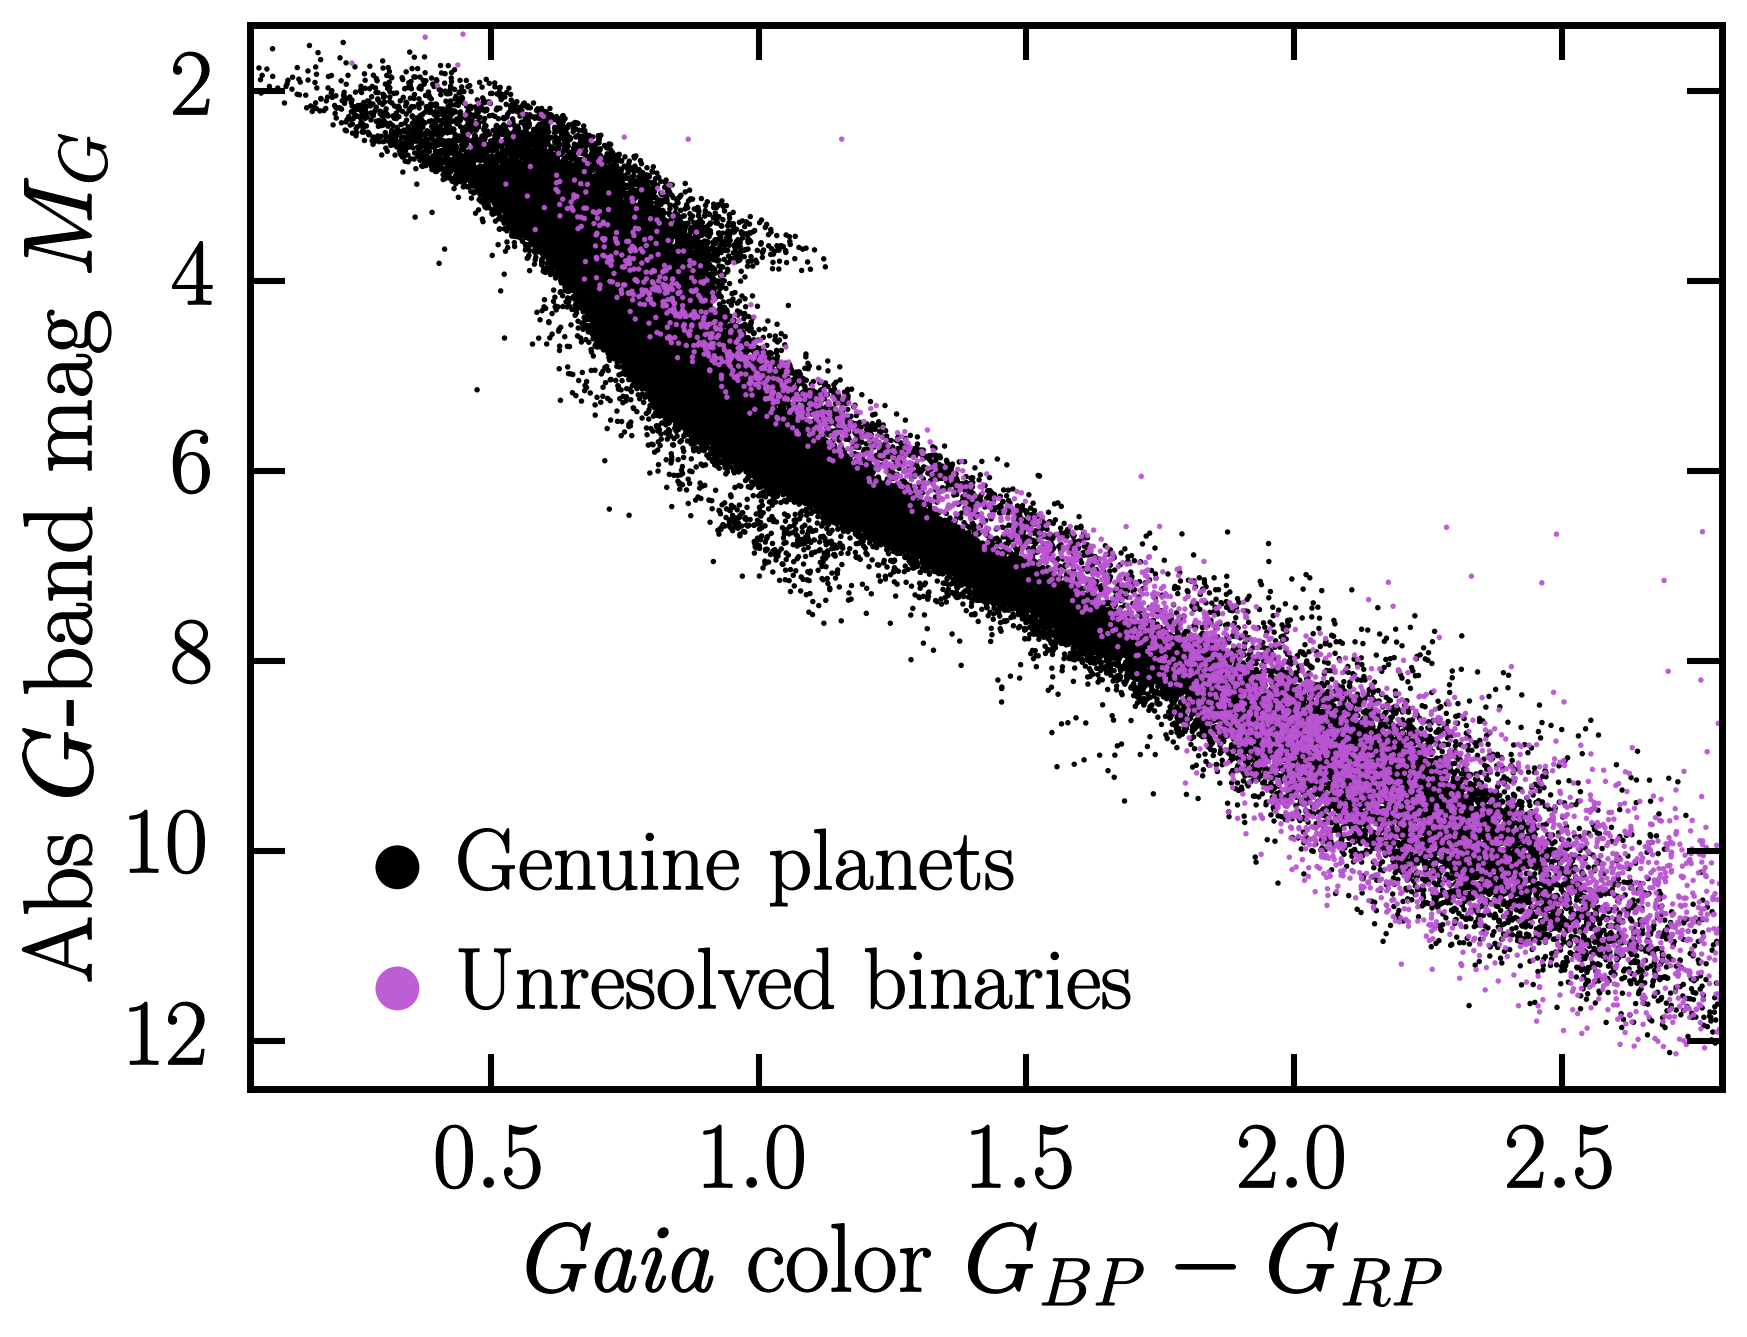

In [17]:
# make plot
plt.figure(figsize=(10*0.76,7*0.76), dpi=250, facecolor='white')
plt.scatter(corrected_DR5_colors, corrected_DR5_MGs, c='k', s=2.5, edgecolor='none', label=r'$\mathrm{Genuine~planets}$')
plt.scatter(DR5_binary_colors, DR5_binary_MGs, c='mediumorchid', s=2.5, alpha=0.95, edgecolor='none', label=r'$\mathrm{Unresolved~binaries}$')
plt.xlim([0.05, 2.8])
plt.ylim([12.5, 1.3])
plt.xlabel(r'$\mathrm{{\it Gaia}~color}~G_{BP} - G_{RP}$', fontsize=28)
plt.ylabel(r'$\mathrm{Abs}~G$-$\mathrm{band~mag}~M_G$', fontsize=28)
plt.legend(loc='lower left', markerscale=8.0, scatterpoints=1, handletextpad=-0.3, borderaxespad=0.3, frameon=False, fontsize=25)
plt.show()